In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading Dataset
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
conditions = [(df['species'] == 'Iris-setosa'),(df['species']=='Iris-versicolor'),(df['species']=='Iris-virginica')]
choices = [0,1,2]

In [10]:
df['species'] = np.select(conditions,choices,default=np.nan)

In [11]:
df['species'].value_counts()

species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


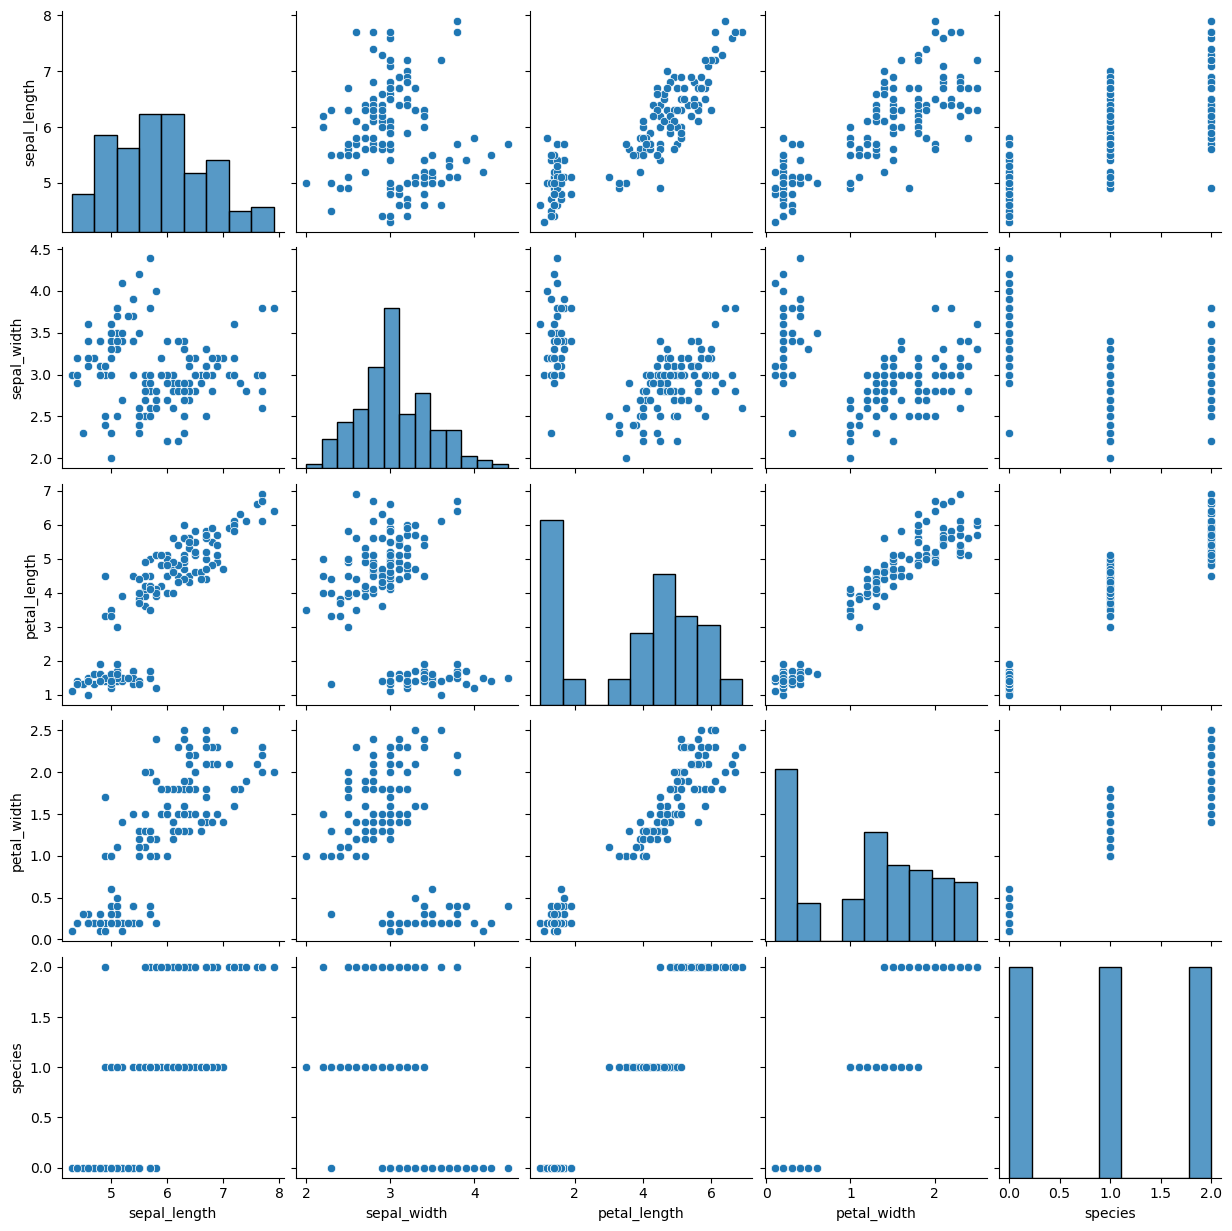

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

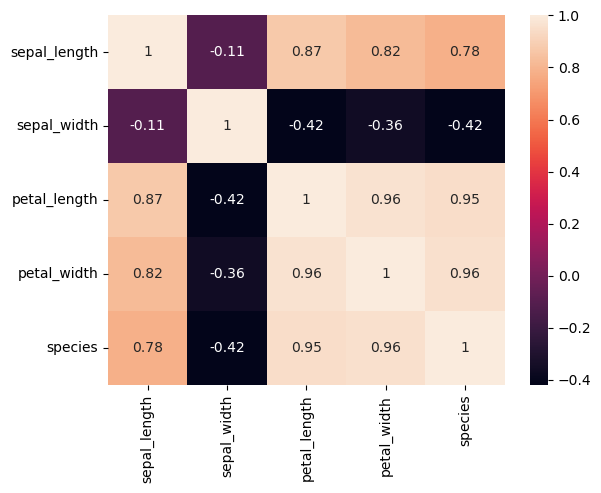

In [16]:
sns.heatmap(df.corr(),annot=True)

# Independent and Dependent Features

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
x = df.drop('species',axis=1)
y = df['species']

In [19]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [20]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [21]:
y_train

81     1.0
133    2.0
137    2.0
75     1.0
109    2.0
      ... 
71     1.0
106    2.0
14     0.0
92     1.0
102    2.0
Name: species, Length: 105, dtype: float64

# Standardization of Independent Features

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

In [25]:
x_train

array([[-0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [ 0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [-0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.89573553,  1.92563026, -1.15167541, -1.13167953],
       [-1.01631531, -2.43298195, -0.21698232, -0.32149987],
       [ 0.55122187, -0.73796609,  0.60087413,  0.75873969],
       [-1.25747488,  0.

In [26]:
log_regression.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = log_regression.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Accuracy

In [29]:
score = accuracy_score(y_test,y_pred) # for Accuracy
cm = confusion_matrix(y_test,y_pred) # confusion matrix
print(score)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Axes: >

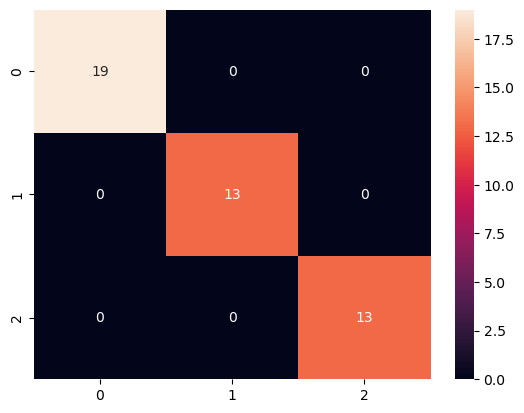

In [30]:
sns.heatmap(cm,annot=True) #confusion matrix

In [31]:
x_test

array([[ 0.3100623 , -0.49582097,  0.48403749, -0.05143998],
       [-0.17225683,  1.92563026, -1.26851205, -1.26670948],
       [ 2.23933883, -0.98011121,  1.76924049,  1.43388941],
       [ 0.18948252, -0.25367584,  0.36720086,  0.35364985],
       [ 1.15412078, -0.49582097,  0.54245581,  0.21861991],
       [-0.53399618,  0.95704977, -1.38534869, -1.13167953],
       [-0.29283662, -0.25367584, -0.15856401,  0.08358997],
       [ 1.27470056,  0.2306144 ,  0.71771076,  1.43388941],
       [ 0.43064208, -1.9486917 ,  0.36720086,  0.35364985],
       [-0.05167705, -0.73796609,  0.01669095, -0.05143998],
       [ 0.79238143,  0.47275953,  0.71771076,  1.02879957],
       [-1.25747488, -0.01153072, -1.443767  , -1.53676936],
       [-0.4134164 ,  1.19919489, -1.50218532, -1.40173942],
       [-1.1368951 ,  0.2306144 , -1.38534869, -1.53676936],
       [-0.89573553,  1.92563026, -1.38534869, -1.26670948],
       [ 0.55122187,  0.71490465,  0.48403749,  0.4886798 ],
       [ 0.79238143, -0.

In [32]:
y_test

73     1.0
18     0.0
118    2.0
78     1.0
76     1.0
31     0.0
64     1.0
141    2.0
68     1.0
82     1.0
110    2.0
12     0.0
36     0.0
9      0.0
19     0.0
56     1.0
104    2.0
69     1.0
55     1.0
132    2.0
29     0.0
127    2.0
26     0.0
128    2.0
131    2.0
145    2.0
108    2.0
143    2.0
45     0.0
30     0.0
22     0.0
15     0.0
65     1.0
11     0.0
42     0.0
146    2.0
51     1.0
27     0.0
4      0.0
32     0.0
142    2.0
85     1.0
86     1.0
16     0.0
10     0.0
Name: species, dtype: float64

In [33]:
# Prediction for new data 
new_data_pred = log_regression.predict([[5.4,3.4,1.5,0.4]])
new_data_pred

array([2.])

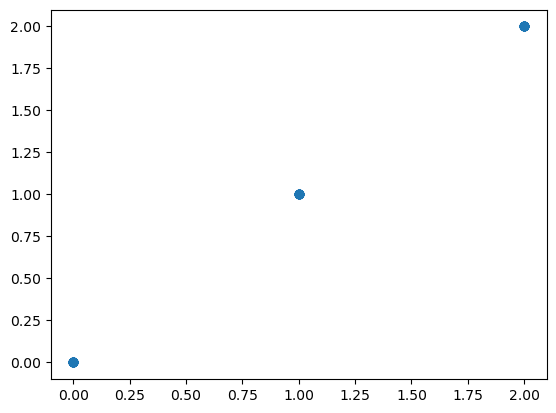

In [34]:
plt.scatter(y_test,y_pred)